 Build the Image classification model by dividing the model into following 4 stages:
 
a. Loading and preprocessing the image data

b. Defining the model’s architecture

c. Training the model

d. Estimating the model’s performance


In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np

C:\python37\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
input_shape = (28, 28, 1)

In [3]:

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)


In [4]:

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


In [5]:

x_train = x_train/255
x_test = x_test/255
print("Shape of Training : ", x_train.shape)
print("Shape of Testing : ", x_test.shape)

Shape of Training :  (60000, 28, 28, 1)
Shape of Testing :  (10000, 28, 28, 1)


In [6]:

model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(200, activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(10, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 28)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 200)               946600    
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2010      
                                                        

In [11]:

model.compile(optimizer='adam', loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model.fit(x_train, y_train, epochs = 2)


Epoch 1/2
1875/1875 [==============================] - 78s 39ms/step - loss: 0.1992 - accuracy: 0.9397
Epoch 2/2
1875/1875 [==============================] - 77s 41ms/step - loss: 0.0813 - accuracy: 0.9749


In [12]:

test_loss, test_acc = model.evaluate(x_test, y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)


313/313 [==============================] - 5s 12ms/step - loss: 0.0567 - accuracy: 0.9828
Loss=0.057
Accuracy=0.983


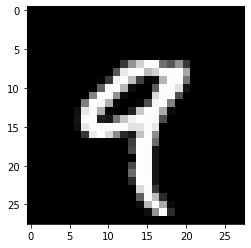

In [13]:

image = x_train[4]
plt.imshow(np.squeeze(image), cmap='gray')
plt.show()


In [14]:

image = image.reshape(1, image.shape[0], image.shape[1], image.shape[2])
predict_model = model.predict([image])
print("Predicted class: {}".format(np.argmax(predict_model)))


1/1 [==============================] - 1s 504ms/step
Predicted class: 9
